# Unsupervised Machine Learning for the Classification of Astrophysical X-ray Sources
###### *Víctor Samuel Pérez Díaz<sup>1</sup>, Rafael Martinez-Galarza<sup>2</sup>, Alexander Caicedo-Dorado<sup>1</sup>, Raffaele D'Abrusco<sup>2</sup>*

*1. Universidad del Rosario, 2. Center for Astrophysics | Harvard & Smithsonian*

---

#### Predominance in clusters

Here we are going to analyze the predominance of classes extracted from SIMBAD in each cluster.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm
import math
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Edit the font, font size, and axes width

mpl.rcParams['font.family'] = 'Avenir LT Std'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

In [3]:
sim_data = pd.read_csv('new_sim_data_colors.csv')
sim_df = sim_data[['name', 'cluster', 'main_type']]
sim_df_clean = sim_df.copy(deep=True).fillna('NaN')

In [4]:
def create_summary_tables(df):
    tables = []
    for n in np.unique(df.cluster):
        data_n = df[sim_df_clean.cluster == n]
        count_obs = data_n.groupby(['main_type']).size()
        df_n = pd.concat([count_obs],axis=1)
        df_n = df_n.rename(columns={0:'size'})
        tables.append(df_n)
    return tables

In [5]:
tables = create_summary_tables(sim_df_clean)

In [6]:
cl = 5
quer = tables[cl].sort_values(by='size', ascending=False).head(10)
quer

,size
main_type,
QSO,176
NaN,67
Seyfert_1,63
BLLac,19
X,13
AGN,11
Seyfert_2,10
LINER,8
AGN_Candidate,7


#### Probability plots

We are going to produce some probability distribution plots in order to compare the different results from our pipelines. In order to separate observations we can do two things, separate them by using our assigned main_type, or selecting the clusters that have a particular predominance.

We are going with the second to select the observations that were used in the first x-ray pipeline. We observed that clusters 1, 2 and 3 tended to have a predominance in AGN and QSO.

In [7]:
sim_data_xray = pd.read_csv('gmm6_allvar_0_simbad.csv')

In [9]:
cl1_xray = pd.read_csv('./class_data_xray/cl1_mean.csv')
cl2_xray = pd.read_csv('./class_data_xray/cl2_mean.csv')
cl3_xray = pd.read_csv('./class_data_xray/cl3_mean.csv')

cl0_optixray = pd.read_csv('./class_data_optixray_5classes/cl0.csv')
cl1_optixray = pd.read_csv('./class_data_optixray_5classes/cl1.csv')
cl2_optixray = pd.read_csv('./class_data_optixray_5classes/cl2.csv')
cl3_optixray = pd.read_csv('./class_data_optixray_5classes/cl3.csv')
cl4_optixray = pd.read_csv('./class_data_optixray_5classes/cl4.csv')
cl5_optixray = pd.read_csv('./class_data_optixray_5classes/cl5.csv')

In [10]:
extragalac_xray_names = np.concatenate([np.unique(cl1_xray.name), np.unique(cl2_xray.name), np.unique(cl3_xray.name)])
optixray_names = np.unique(sim_data.name)

In [11]:
extragalac_names = np.intersect1d(extragalac_xray_names, optixray_names)

In [12]:
len(extragalac_names)

722

In [25]:
src_nname = '2CXO J000607.5+110144'
print(src_nname)

2CXO J000607.5+110144


In [26]:
sim_data[sim_data.name == src_nname][['name', 'obsid', 'cluster']]

,name,obsid,cluster
2726,2CXO J000607.5+110144,12251,2


In [27]:
sim_data_xray[sim_data_xray.name == src_nname][['name', 'obsid', 'cluster']]

,name,obsid,cluster
30,2CXO J000607.5+110144,12251,1


In [41]:
def generate_probability_plot(src_name, src_obsid, df1, df2):
    probas1 = df1[(df1.name == src_name) & (df1.obsid == src_obsid)]
    probas1 = probas1.iloc[:, -5:]
    print(probas1)
    print(probas1.columns)
    probas2 = df2[(df2.name == src_name) & (df2.obsid == src_obsid)]
    probas2 = probas2.iloc[:, -5:]
    plt.plot(probas1.columns, probas1.iloc[0], marker='^', color='red', linestyle='dashed')
    plt.plot(probas2.columns, probas2.iloc[0], marker='o', color='blue')
    plt.title('Probabilities for ' + src_name + ', obsid: ' + str(src_obsid))
    plt.legend(['CSC + SDSS', 'CSC'])
    plt.ylim([0, 1])
    plt.xticks(rotation=90)
    plt.show()

          AGN  AGN_Candidate    Galaxy       QSO  Seyfert_1
496  0.211493        0.20464  0.192381  0.207076    0.18441
Index(['AGN', 'AGN_Candidate', 'Galaxy', 'QSO', 'Seyfert_1'], dtype='object')


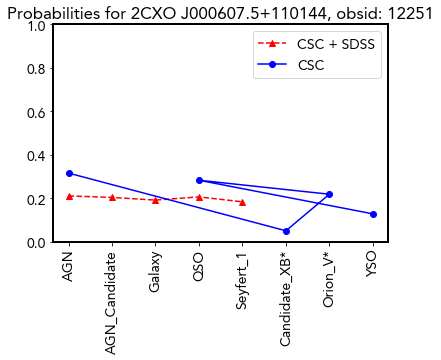

In [42]:
generate_probability_plot(src_nname, 12251, cl2_optixray, cl1_xray)

Comparing multiple observations classification probabilities:

1. Merge all the optixray classification tables.
2. Merge a particular xray table with the table created in 1.
3. Visualize in two different ways: putting all the observations in one plot, or plotting by observation.

In [45]:
# Merge all the optixary classification tables.
optixray_all = pd.DataFrame(columns=['name', 'obsid'])
optixray_all = optixray_all.merge(cl0_optixray, how='right', on=['name', 'obsid'])
optixray_all = optixray_all[['name', 'obsid', 'main_type', 'AGN', 'QSO', 'Seyfert_1']]
optixray_all = pd.concat([optixray_all, cl1_optixray.iloc[:, np.r_[1:3,43:49]]])
optixray_all = pd.concat([optixray_all, cl2_optixray.iloc[:, np.r_[1:3,43:49]]])
optixray_all = pd.concat([optixray_all, cl3_optixray.iloc[:, np.r_[1:3,43:49]]])
optixray_all = pd.concat([optixray_all, cl4_optixray.iloc[:, np.r_[1:3,43:49]]])
optixray_all = pd.concat([optixray_all, cl5_optixray.iloc[:, np.r_[1:3,43:49]]])

In [46]:
optixray_all

,name,obsid,main_type,AGN,QSO,Seyfert_1,AGN_Candidate,Galaxy,GinCl,Seyfert_2,BLLac
0,2CXO J144214.1+005741,3960,AGN,0.261699,0.210289,0.237926,NaN,NaN,NaN,NaN,NaN
1,2CXO J142842.4+004640,14006,AGN,0.268582,0.208035,0.185502,NaN,NaN,NaN,NaN,NaN
2,2CXO J085135.1+520612,13262,AGN_Candidate,0.227033,0.194332,0.181869,NaN,NaN,NaN,NaN,NaN
3,2CXO J150100.0+014941,12952,AGN,0.236810,0.214201,0.189022,NaN,NaN,NaN,NaN,NaN
4,2CXO J122907.8+033857,3150,AGN,0.236492,0.201634,0.201612,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
77,2CXO J230817.4-015552,4962,AGN,0.235721,0.210251,0.190981,NaN,NaN,NaN,0.186317,0.176731
78,2CXO J005823.0+265653,6830,AGN,0.236122,0.206079,0.185653,NaN,NaN,NaN,0.215881,0.156265
79,2CXO J235439.9+194506,5536,AGN,0.223703,0.212953,0.191944,NaN,NaN,NaN,0.174376,0.197024
80,2CXO J232547.6+263434,11830,AGN,0.245902,0.211544,0.189764,NaN,NaN,NaN,0.182137,0.170653


In [47]:
# Merge a particular xray table with the table created in 1.

x_plus_optixray = pd.DataFrame(data=cl1_xray.iloc[:, 1:])
x_plus_optixray = x_plus_optixray.merge(optixray_all, how='inner', on=['name', 'obsid'], suffixes=['_xray', '_optixray'])

In [48]:
x_plus_optixray

,name,obsid,main_type_xray,AGN_xray,Candidate_XB*,Orion_V*,QSO_xray,YSO,main_type_optixray,AGN_optixray,QSO_optixray,Seyfert_1,AGN_Candidate,Galaxy,GinCl,Seyfert_2,BLLac
0,2CXO J000144.7+131150,8491,QSO,0.224380,0.107031,0.188369,0.250025,0.230195,Seyfert_1,0.197826,0.199478,0.207338,0.203302,0.192055,NaN,NaN,NaN
1,2CXO J000144.7+131150,6978,QSO,0.260091,0.089838,0.176090,0.273833,0.200148,AGN_Candidate,0.198318,0.199514,0.202705,0.204968,0.194494,NaN,NaN,NaN
2,2CXO J000313.6+161956,11309,AGN,0.481673,0.002580,0.070200,0.283177,0.162370,AGN,0.215065,0.203015,0.179176,0.200387,0.202356,NaN,NaN,NaN
3,2CXO J000607.5+110144,12251,AGN,0.316606,0.051218,0.219351,0.283684,0.129141,AGN,0.211493,0.207076,0.184410,0.204640,0.192381,NaN,NaN,NaN
4,2CXO J000957.7+255347,10401,QSO,0.317673,0.067863,0.109340,0.363016,0.142108,AGN_Candidate,0.193916,0.197633,0.201446,0.208883,0.198123,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2CXO J233639.6+210235,16136,YSO,0.203544,0.000726,0.306410,0.055737,0.433583,AGN_Candidate,0.197316,0.199504,0.195513,0.213020,0.194647,NaN,NaN,NaN
587,2CXO J233732.6+270535,4816,AGN,0.367290,0.007757,0.180652,0.123407,0.320893,QSO,0.202836,0.205790,0.203013,NaN,NaN,0.18717,0.201191,NaN
588,2CXO J234433.1+260038,7124,Candidate_XB*,0.040432,0.328335,0.303452,0.094713,0.233068,QSO,0.197639,0.206300,0.200097,0.203797,0.192167,NaN,NaN,NaN
589,2CXO J235439.9+194506,5536,QSO,0.283143,0.003360,0.192448,0.333961,0.187087,AGN,0.223703,0.212953,0.191944,NaN,NaN,NaN,0.174376,0.197024


In [56]:
# visualize

def gen_general_prob_plots(xray_cl):
    x_plus_optixray = pd.DataFrame(data=xray_cl.iloc[:, 1:])
    x_plus_optixray = x_plus_optixray.merge(optixray_all, how='inner', on=['name', 'obsid'], suffixes=['_xray', '_optixray'])
    
    colors = cm.get_cmap('tab10', 4)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_ylim(-0.05, 1)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='out')
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
    ax.set_xlabel('Class', labelpad=10)
    ax.set_ylabel('Probability', labelpad=10)
    for index, row in x_plus_optixray.iterrows(): 
        probas1 = row[3:x_plus_optixray.columns.get_loc('main_type_optixray')]
        probas2 = row[x_plus_optixray.columns.get_loc('main_type_optixray')+1:]
        
        p1_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas1.index if ~np.isnan(probas1[x])]
        p2_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas2.index if ~np.isnan(probas2[x])]
        p1_val = [x for x in probas1.values if ~np.isnan(x)]
        p2_val = [x for x in probas2.values if ~np.isnan(x)]
        ax.plot(p1_in, p1_val, marker='o', color=colors(0), lw=0.15, alpha=0.6, ms=2)
        ax.plot(p2_in, p2_val, marker='^', color=colors(1), lw=0.2,ms=5)

    ax.legend(['CSC', 'CSC + SDSS'], bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
    plt.title('Probability distributions X-ray cluster 3')
    plt.xticks(rotation=90)
    #plt.savefig('figures/xraycl3_5classes.png', dpi=300, transparent=False, bbox_inches='tight')

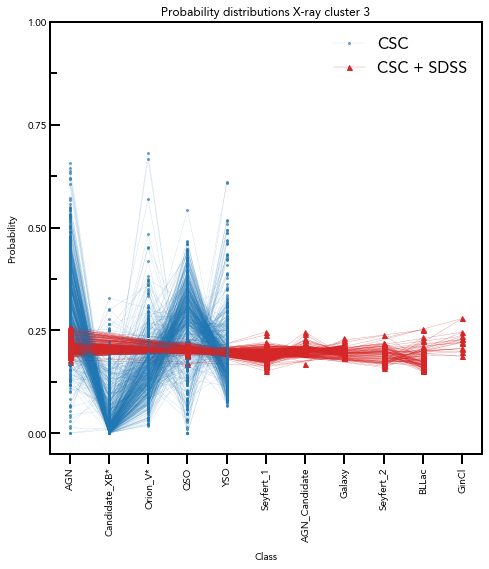

In [57]:
gen_general_prob_plots(cl1_xray)

In [54]:
def gen_particular_prob_plots(xray_cl):
    x_plus_optixray = pd.DataFrame(data=xray_cl.iloc[:, 1:])
    x_plus_optixray = x_plus_optixray.merge(optixray_all, how='inner', on=['name', 'obsid'], suffixes=['_xray', '_optixray'])
    
    colors = cm.get_cmap('tab10', 4)
    
    nrow = 40; ncol = 6;
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(14,84))
    #fig.subplots_adjust(left=0.125, bottom=0.6, right=0.9, top=0.9)
    fig.tight_layout(h_pad=8)
    for i, ax in enumerate(axs.reshape(-1)): 
        ax.set_ylim(-0.05, 1)
        ax.yaxis.set_tick_params(which='major', size=6, width=0.5, direction='in')
        ax.yaxis.set_tick_params(which='minor', size=3, width=0.5, direction='in')
        ax.xaxis.set_tick_params(which='major', size=6, width=0.5, direction='out')
        ax.xaxis.set_tick_params(which='minor', size=3, width=0.5, direction='out')
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
        #ax.set_xlabel('Class', labelpad=10)
        #ax.set_ylabel('Probability', labelpad=10)
         
        row = x_plus_optixray.loc[i]
        probas1 = row[3:x_plus_optixray.columns.get_loc('main_type_optixray')]
        probas2 = row[x_plus_optixray.columns.get_loc('main_type_optixray')+1:]
        
        p1_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas1.index if ~np.isnan(probas1[x])]
        p2_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas2.index if ~np.isnan(probas2[x])]
        p1_val = [x for x in probas1.values if ~np.isnan(x)]
        p2_val = [x for x in probas2.values if ~np.isnan(x)]
        ax.plot(p1_in, p1_val, marker='o', color=colors(0), lw=1, ms=5, label='CSC')
        ax.plot(p2_in, p2_val, marker='^', color=colors(1), lw=1,ms=5, label='CSC + SDSS', linestyle='dashed')
        
        ax.set_title(row['name']+', '+str(row['obsid']), fontsize=8)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
        handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.01))
    
    plt.savefig('figures/xray1_longplot_5classes.pdf', dpi=300, transparent=False, bbox_inches='tight')

'AvenirLTStd-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


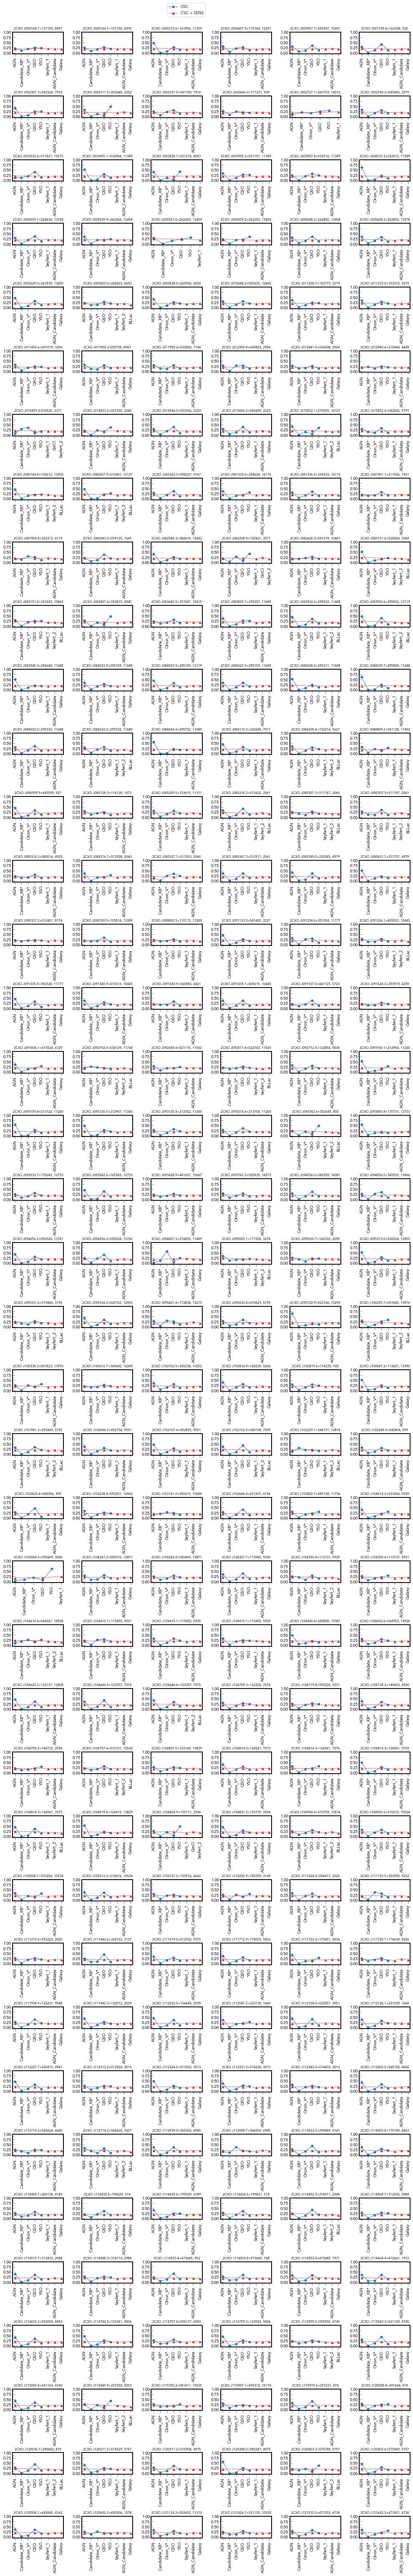

In [55]:
plt.rcParams['font.size'] = 10
gen_particular_prob_plots(cl1_xray)